<img src = 'Images/1-156039trapezium.jpeg'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [3]:
mangaid = '1-156039'
nsa_z = 0.114699
plateifu = '8439-3704'

In [4]:
drpall_list = fits.open("/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/platelist-v2_4_3.fits")

In [5]:
objlist = drpall_list[2].data

In [6]:
# Compare p james' mangaid with drpall mangaid to get the plateifu number 
plateifu = {}
# lst = []
for i in range(len(objlist)):
    if objlist[i][3] in mangaid:
        if objlist[i][3] in plateifu:
            plateifu[objlist[i][3]].append(objlist[i][2])
        else:
            plateifu[objlist[i][3]] = [objlist[i][2]]

In [7]:
plateifu

{'1-156039': ['8439-3704']}

In [8]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8439-3704-LOGCUBE.fits.gz')

In [9]:
np.round((data[0].header)['OBJRA'],7), np.round((data[0].header)['OBJDEC'],7)

(143.9406592, 49.0232114)

In [10]:
# retrieve the flux density values
flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

In [11]:
# retrieve the ivar values
ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

In [12]:
# retrieve the mask values 
mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

In [13]:
do_not_use = (mask & 2**10) != 0 

In [14]:
# retrieve the wave values 
wave = data['WAVE'].data

In [15]:
# retrieve the flux header values...but why tho ?
flux_header = data['FLUX'].header

In [16]:
# sum flux density values element wise to get total flux density
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j]
        sumflux = np.add(sumflux, flux[i,j])

In [17]:
# check the redhsift
a = 5007 * (1 + nsa_z)

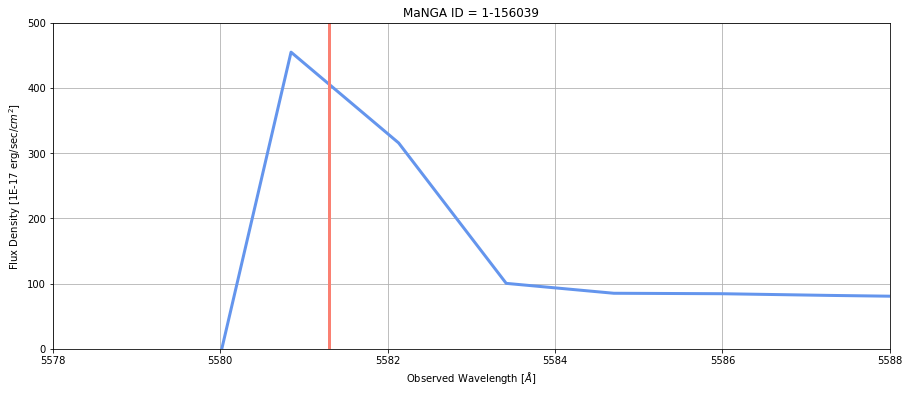

In [18]:
# start = 5578
# end = 5585

start = 5578
end = 5588
height = 500
plt.figure(figsize = (15,6))
plt.grid()
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.xlim(start, end)
plt.ylim(0,height)
plt.plot(wave, sumflux, linewidth = 3, color = 'cornflowerblue')
plt.axvline(a, linewidth = 3, color = 'salmon')
# plt.savefig('Images/Check_z_{}'.format(mangaid), bbox_inches = 'tight')

In [19]:
# select peak region
index = -1
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
yaxis = yaxis[1:6]
print(yaxis)
print(len(yaxis))

# for i in yaxis:
#     print(wave[i])

[1877 1878 1879 1880 1881]
5


In [26]:
flux_compare = [] 
ivar_compare = []
mask_compare = []

for i in yaxis:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())
    mask_compare.append(do_not_use[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)
mask_compare = np.array(mask_compare)

len(flux_compare[0]), len(ivar_compare), len(mask_compare[0])

(1936, 5, 1936)

In [27]:
result = []
sumresult = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        flux_compare_masked = flux_compare[i] * ~mask_compare[i]
        if flux_compare[i][j] != flux_compare_masked[j]:
            print('something')
        # To mask flux_compare by multiplying to the whole mask array. So use i only.
        
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        # Have to mask flux compare -- but mask before or after comparing with sigma ? 
        # My guess = mask first.
        
        if flux_compare_masked[j] < (3 * sigma):
            
            result.append(0)
        else:
            result.append(flux_compare_masked[j])
    sumresult.append(np.sum(result))
    result = []
    
    #True True .... True True

In [28]:
result_unmasked = []
sumresult_unmasked = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        
#         flux_compare_masked = flux_compare[i] * ~mask_compare[i]
        # To mask flux_compare by multiplying to the whole mask array. So use i only.
        
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        # Have to mask flux compare -- but mask before or after comparing with sigma ? 
        # My guess = mask first.
        
        if flux_compare[i][j] < (3 * sigma):
            
            result_unmasked.append(0)
        else:
            result_unmasked.append(flux_compare[i][j])
    sumresult_unmasked.append(np.sum(result_unmasked))
    result_unmasked = []

In [73]:
sumresult[index]

83.3220219668001

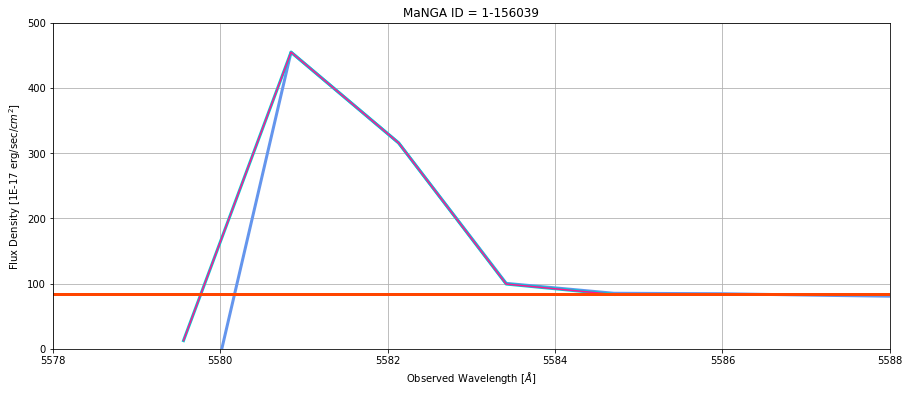

In [29]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult_unmasked, color = 'deeppink', linewidth = 1.5)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [45]:
line1 = 5579.5
line2 = 5581.5
height1 = 0
height2 = 600

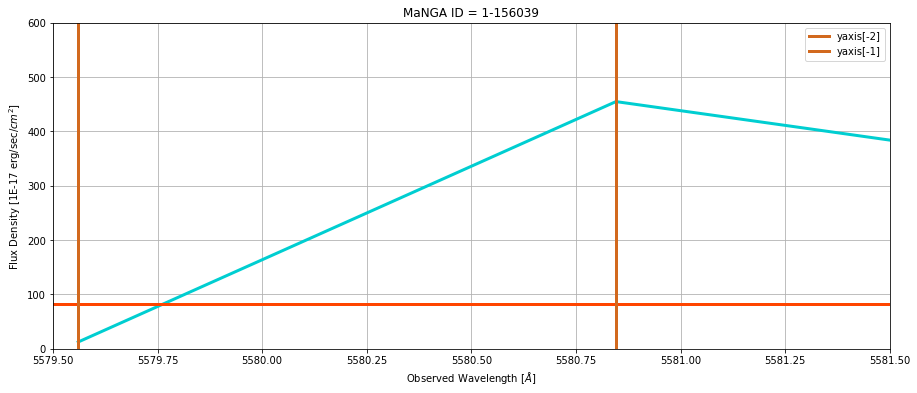

In [46]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis[0]], color = 'chocolate', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis[1]], color = 'chocolate', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955

# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [47]:
sumresult[0]

12.561363458633423

In [48]:
index2 = np.where(yaxis == yaxis[1])[0][0]
print(index2)
sumresult[index2]

1


454.7569334656

In [49]:
# Get x and y of the both coordinates that define the line above 
x = [wave[yaxis[0]], wave[yaxis[1]]]
y = [sumresult[0], sumresult[1]]
print(x)
print(y)
print(sumresult[index2])

[5579.560614821764, 5580.845504054144]
[12.561363458633423, 454.7569334656]
454.7569334656


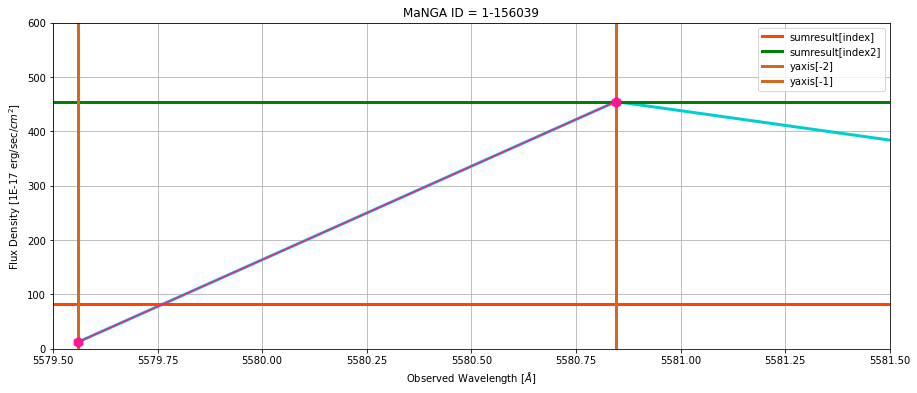

In [50]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'sumresult[index]')
plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.axvline(wave[yaxis[0]], color = 'chocolate', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis[1]], color = 'chocolate', linewidth = 3, label = 'yaxis[-1]')

plt.plot(x, y, marker = 'h', ms = 10, color = 'deeppink')



plt.legend()
#1954 1955

# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [51]:
# Get the gradient of the line above 
m = (y[1] - y[0])/(x[1] - x[0])
m

344.1507321124362

In [52]:
# Get the y intercept of the line above 
c = y[0] - m*x[0]
c

-1920197.309093166

In [53]:
# Define the function y = mx + c 
def func(y, m, c):
    print(y, m, c)
    x = (y - c)/m
    return x

In [54]:
xval = func(sumresult[index], m, c)
xval

83.3220219668001 344.1507321124362 -1920197.309093166


5579.766224317562

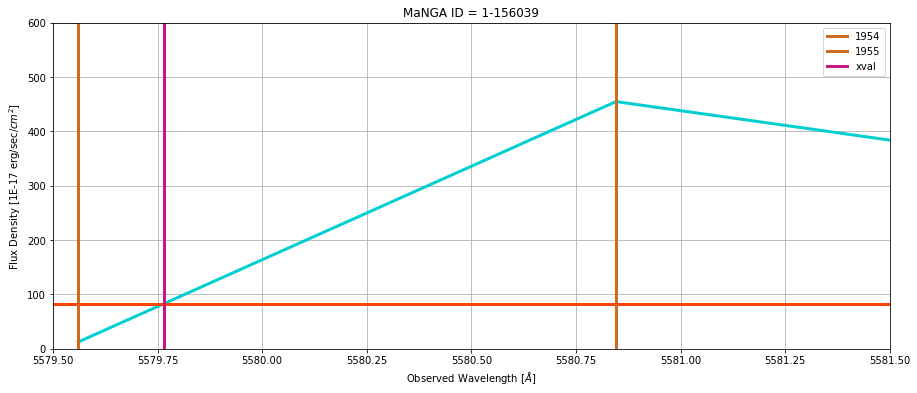

In [55]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis[0]], color = 'chocolate', linewidth = 3, label = '1954')
plt.axvline(wave[yaxis[1]], color = 'chocolate', linewidth = 3, label = '1955')
plt.axvline(xval, color = 'mediumvioletred', linewidth = 3, label = 'xval')

plt.legend()
#1954 1955

# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [56]:
xcoord = []
ycoord = []

ycoord.append(sumresult[index])

for i in range(yaxis[0], yaxis[-1]):
    xcoord.append(wave[i])
    
xcoord[0] = xval
# xcoord.append(5587)
xcoord.append(wave[yaxis[-1]])
    
for i in range(1, len(sumresult)):
    ycoord.append(sumresult[i])

len(xcoord), len(sumresult), len(ycoord)
print(xcoord)
print(ycoord)
# print(wave[yaxis])

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

[5579.766224317562, 5580.845504054144, 5582.130689177262, 5583.416170259268, 5584.701947368307]
[83.3220219668001, 454.7569334656, 315.60930719971657, 99.25229459442198, 83.3220219668001]


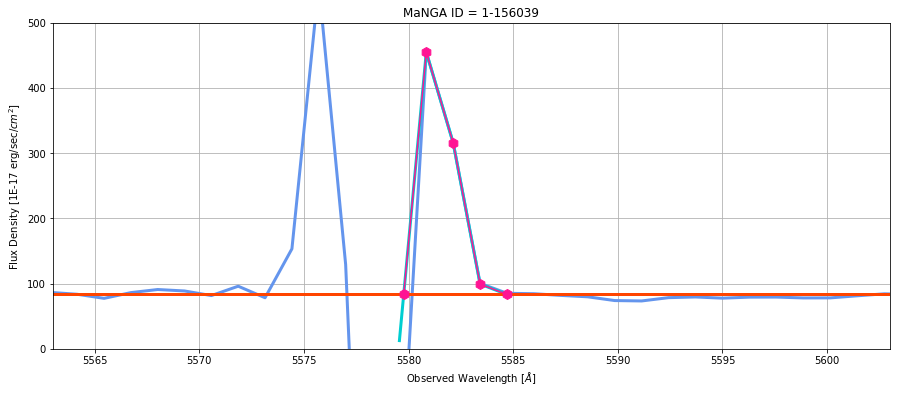

In [62]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start-15, end+15)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.plot(xcoord, ycoord, color = 'deeppink', marker = 'h', ms = 10)
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')

# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [63]:
dlmd = []
for i in range(len(xcoord)-1):
    dlmd.append(xcoord[i+1] - xcoord[i])

In [64]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area = ycoord[0] * dlmd[0] + ycoord[-1] * dlmd[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord)-1):
#     print(i)
    area += ycoord[i] * (dlmd[i-1] + dlmd[i])

finalarea = (1/2) * area
finalarea

1169.4237814124085

In [65]:
subtract = ycoord[0] * (xcoord[-1] - xcoord[0])
subtract

411.2544244562044

In [66]:
fluxarea = finalarea - subtract
fluxarea

758.1693569562042

In [67]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

nsa_z

0.114699

### With the subtraction 

In [68]:
luminosity_distance = Mpc_to_cm(533.1)
luminosity = luminosity_calc(luminosity_distance, fluxarea)
print(luminosity_distance, 'cm', '/', luminosity, ('erg/s (?)'))

1.644976008e+27 cm / 2.5780731024004132e+41 erg/s (?)


In [69]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

In [70]:
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

M_BH / M_sol = 6539764.094213597
log(luminosity) = 41.41129522780365
log(M_BH / M_sol) = 6.815562082509417
log(luminosity / sol_lum) = 7.82628594790119


### Without the subtraction

In [71]:
luminosity_without_subtract = luminosity_calc(luminosity_distance, finalarea)
print(luminosity_distance, 'cm', '/', luminosity_without_subtract, ('erg/s (?)'))

1.644976008e+27 cm / 3.9764994041309756e+41 erg/s (?)


In [72]:
print('M_BH / M_sol =',BH_calc(luminosity_without_subtract))
print('log(luminosity) =',np.log10(luminosity_without_subtract))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_without_subtract)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_without_subtract / sol_luminosity))

M_BH / M_sol = 10087133.681191674
log(luminosity) = 41.59950092171078
log(M_BH / M_sol) = 7.003767776416545
log(luminosity / sol_lum) = 8.014491641808318
